# Realizado por Enrique Vázquez Iriarte

Importamos las librerias

In [3]:
#Importación de todas las librerías que vamos a usar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.svm import SVC
import numpy as np


#Ignoramos los warnings para tener una salida limpia
warnings.filterwarnings("ignore")

#Cargamos Wandb
import wandb

Convertimos el dataset a un DataFrame y mostramos los 5 primeros elementos.

In [4]:
iris = pd.read_csv("./data/Iris.csv")
iris.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Ahora veremos las características principales del dataset:

In [5]:
iris.info() #Información general sobre filas y columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.describe() #Información sobre las estadísticas descriptivas

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
iris['Species'].value_counts() #Cantidad de registros por cada especie

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Visualización de los datos


Text(0.5, 1.0, 'Distribución del ancho de los pétalos (cm)')

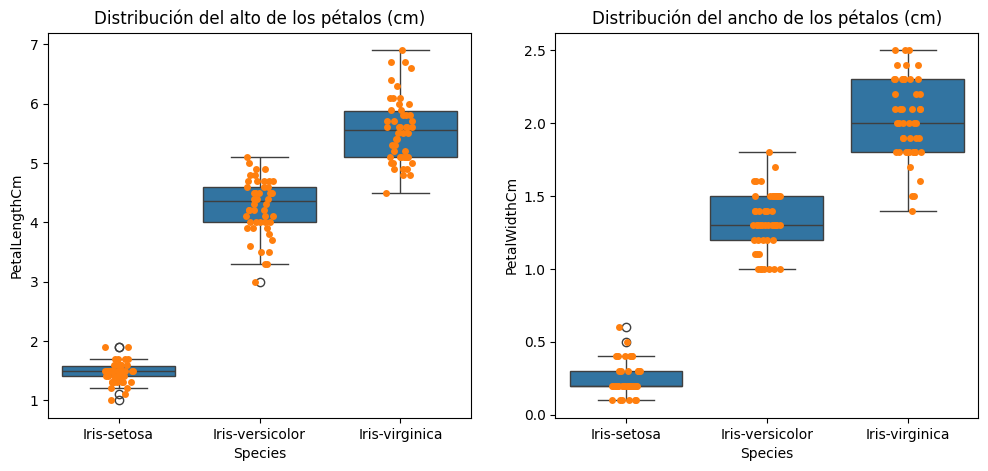

In [8]:
###PÉTALOS###
#Definimos los dos gráficos.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

#PetalLengthCm:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris, ax=axes[0])
sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="gray", ax=axes[0])
axes[0].set_title("Distribución del alto de los pétalos (cm)")

#PetalWidthCm:
sns.boxplot(x="Species", y="PetalWidthCm", data=iris, ax=axes[1])
sns.stripplot(x="Species", y="PetalWidthCm", data=iris, jitter=True, edgecolor="gray", ax=axes[1])
axes[1].set_title("Distribución del ancho de los pétalos (cm)")


#Observamos el rango de largo y de ancho de los pétalos de cada especie,
# y los puntos naranjas representan cada muestra individual dentro del conjunto.

Text(0.5, 1.0, 'Distribución del ancho de los sépalos (cm)')

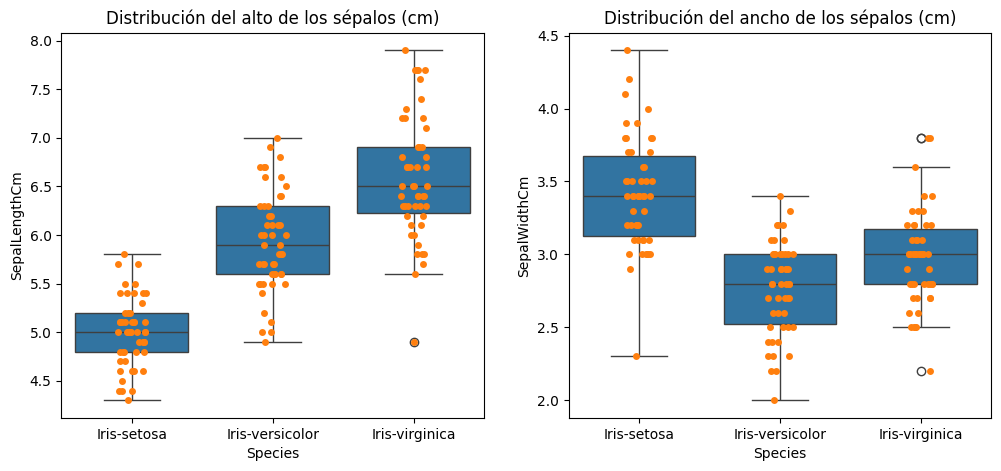

In [9]:
###SÉPALOS###
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
ax = sns.boxplot(x="Species", y="SepalLengthCm", data=iris, ax=axes[0])
ax = sns.stripplot(x="Species", y="SepalLengthCm", data=iris, jitter=True, edgecolor="gray", ax=axes[0])
axes[0].set_title("Distribución del alto de los sépalos (cm)")

sns.boxplot(x="Species", y="SepalWidthCm", data=iris, ax=axes[1])
sns.stripplot(x="Species", y="SepalWidthCm", data=iris, jitter=True, edgecolor="gray", ax=axes[1])
axes[1].set_title("Distribución del ancho de los sépalos (cm)")

#Observamos el rango de largo y de ancho de los sépalos de cada especie,
# y los puntos naranjas representan cada muestra individual dentro del conjunto.

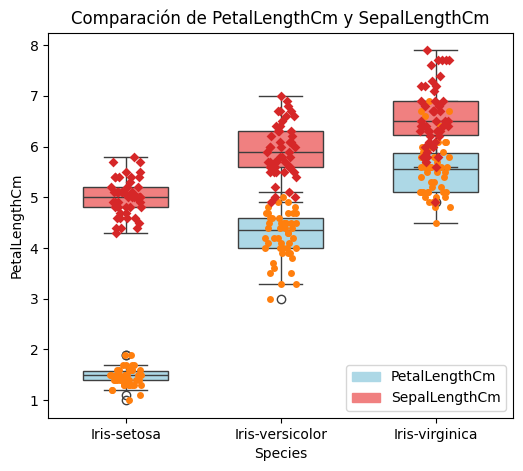

In [10]:
#Comparación del largo de los pétalos y sépalos#

plt.figure(figsize=(6, 5))
sns.boxplot(x="Species", y="PetalLengthCm", data=iris, width=0.55, boxprops={'facecolor':'lightblue'}, zorder=1)
sns.stripplot(x="Species", y="PetalLengthCm", data=iris, jitter=True, edgecolor="black", zorder=2)

sns.boxplot(x="Species", y="SepalLengthCm", data=iris, width=0.55, boxprops={'facecolor':'lightcoral'}, zorder=1)
sns.stripplot(x="Species", y="SepalLengthCm", data=iris, jitter=True, edgecolor="black", marker="D", zorder=3)

plt.title("Comparación de PetalLengthCm y SepalLengthCm")
petal_patch = mpatches.Patch(color="lightblue", label="PetalLengthCm")
sepal_patch = mpatches.Patch(color="lightcoral", label="SepalLengthCm")

plt.legend(handles=[petal_patch, sepal_patch], loc="lower right")



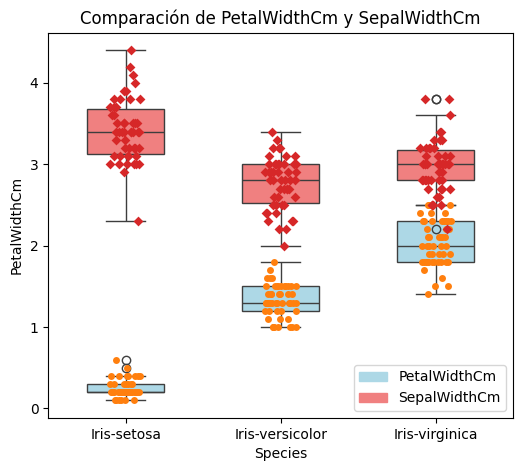

In [11]:
#Comparación del ancho de los pétalos y sépalos#

plt.figure(figsize=(6, 5))
sns.boxplot(x="Species", y="PetalWidthCm", data=iris, width=0.5, boxprops={'facecolor':'lightblue'}, zorder=1)
sns.stripplot(x="Species", y="PetalWidthCm", data=iris, jitter=True, edgecolor="black", zorder=2)

sns.boxplot(x="Species", y="SepalWidthCm", data=iris, width=0.5, boxprops={'facecolor':'lightcoral'}, zorder=1)
sns.stripplot(x="Species", y="SepalWidthCm", data=iris, jitter=True, edgecolor="black", marker="D", zorder=3)

plt.title("Comparación de PetalWidthCm y SepalWidthCm")
petal_patch = mpatches.Patch(color="lightblue", label="PetalWidthCm")
sepal_patch = mpatches.Patch(color="lightcoral", label="SepalWidthCm")

plt.legend(handles=[petal_patch, sepal_patch], loc="lower right")

# Hacemos el login en Wandb (consola: pip install wandb / wandb login)

In [12]:
#Declaro el grupo, el proyecto y el nombre de esta ejecución.
wandb.init(entity="enriquevaz-cei-myorg",project="Iris Dataset trabajo CEI", name="SVM: RBF")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: enriquevaz (enriquevaz-cei-myorg) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [13]:
#He creado otra variable del dataset, para que no se mezcle con la primera parte de visualización de datos.
irisdf = iris


In [14]:
#Eliminamos la columna "Species" del dataframe (el objetivo), y metemos el valor en la variable "y"
X = irisdf.drop("Species", axis=1)
y = irisdf["Species"]
X.head(10)#Para comprobar que la columna target se ha "eliminado" correctamente

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
5,6,5.4,3.9,1.7,0.4
6,7,4.6,3.4,1.4,0.3
7,8,5.0,3.4,1.5,0.2
8,9,4.4,2.9,1.4,0.2
9,10,4.9,3.1,1.5,0.1


In [15]:
#Ahora que hemos eliminado el target del dataset, lo dividimos en dos conjuntos; el de prueba y el de test (70%/30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
#Prepocesamiento: Escalamos los datos.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
#Creamos el svm, especificamos el kernel y el random state por la reproducibilidad, y luego hacemos la predicción.
svm = SVC(kernel='rbf', random_state = 1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [18]:
#Definimos las métricas que queremos registrar en wandb
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted")
rec = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
conf_matrix = confusion_matrix(y_test, y_pred)


In [19]:
#Registramos las métricas definidas previamente para enviarlas a wandb
wandb.log({
    "accuracy": acc,
    "precision": prec,
    "recall": rec,
    "f1_score": f1
})

In [20]:
#Representación de los resultados.
print("Matriz de confusión del Kernel RBF:")
print(confusion_matrix(y_test, y_pred))

print("Reporte de clasificación del Kernel RBF:")
print(classification_report(y_test, y_pred))


Matriz de confusión del Kernel RBF:
[[14  0  0]
 [ 0 18  0]
 [ 0  0 13]]
Reporte de clasificación del Kernel RBF:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



Text(33.22222222222222, 0.5, 'Actual')

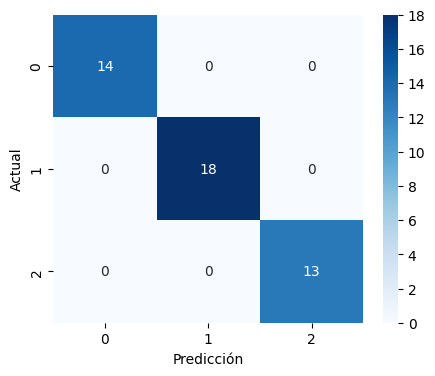

In [21]:
#Representamos la matriz de confusión
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicción")
plt.ylabel("Actual")


In [22]:
wandb.finish()

accuracy,▁
f1_score,▁
precision,▁
recall,▁
accuracy,1
f1_score,1
precision,1
recall,1
